Oddelek za gospodarske dejavnosti in (motorni) promet Mestne občine Ljubljana (MOL) slovi po srce parajoči skrbi za varnost kolesarjev. V imenu te skrbi jim povsod, kjer je to v interesu kolesarjev, odvzame prednost, jim postavlja različne ovire, viša robnike in ukinja kolesarske steze, kjer niso potrebne (predvsem, če je tam slučajno potrebno povečati število parkirišč za avtomobile). Vašemu profesorju se od ganjene hvaležnosti MOLu vsak dan orosi oko ob pogledu na mesto na Večni poti, kjer so - kot je povedal MOL - kolesarjem odvzeli prednost, da jih ne bi povozil avto ali kombi, ki morda ne bi vedel, da imajo tu prednost kolesarji. ([Več o tem si preberite na strani Runda](https://runda.si/article/sikaniranje-dobesedno-).)

## Naloga

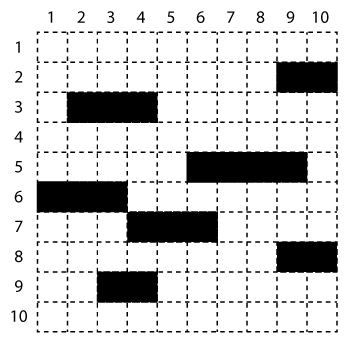

Recimo, da so ovire postavljene, kot kaže slika. V Pythonu bi lahko njihove pozicije opisali s seznamom trojk (terk) `(x1, x2, y)`, kjer sta `x1` in `x2` (`x1 <= x2`) številki stolpca, kjer se ovira začne in konča (ovira vključuje tudi `x2`!). Ovire na sliki bi tako opisali s seznamom

```python
ovire = [(1, 3, 6), (2, 4, 3), (4, 6, 7),
         (3, 4, 9), (6, 9, 5), (9, 10, 2),
		 (9, 10, 8)]
```

Vrstni red elementov seznama je nepomemben.

Napiši naslednje funkcije

- `dolzina_ovire(ovira)` prejme oviro v obliki terke `(x0, x1, y)` in vrne njeno dolžino. Klic `dolzina_ovire((4, 7, 13))` vrne `4`. (Pazi: funkcija ne prejme treh argumentov temveč en argument, namreč terko s tremi elementi.)
- `najdaljsa_ovira(ovire)` prejme seznam ovir in vrne najdaljšo oviro. Če je najdaljših ovir več, vrne tisto, ki se v seznamu pojavi prej.
- `dimenzije(ovire)` vrne širino in dolžino kolesarke steze, največjo vrednost `x2` in največjo vrednost `y`, ki se pojavi med trojkami v seznamu. Za primer na sliki vrne `(10, 9)`.
- `globina(ovire, x)` vrne številko vrstice, v kateri bi kolesar, ki se vozi po podanem stolpcu `x` od zgoraj navzdol, naletel na oviro. Če v stolpcu ni ovir, naj vrne številko, ki je za 1 večja od zadnje vrstice z oviro. Za primer na sliki bi za stolpec brez ovir (če bi na sliki obstajal, seveda) vrnil `10`, saj je zadnja ovira v vrstici `9`.
- `naj_stolpec(ovire)` vrne številko stolpca, v katerem kolesar pride najdlje. Če je takšnih stolpcev več, vrne prvega med njimi.
- `senca(ovire)` vrne seznam, katerega elementa so `False` oz. `True` glede na to, ali stolpec vsebuje kako oviro ali ne. Če je širina poti `5` in sta drugi in zadnji stolpec brez ovir (to ni primer s slike), vrne `[False, True, False, False, True]`.

## Izziv

Vse funkcije, razen `globina` in `sence`, že skoraj znate napisati v eni vrstici. :) (Nekoč pa se bomo naučili tudi tidve; ni zapleteno, vendar pač še ne znamo.)

Neobvezni, dodatni izziv za tiste, ki se vas da izzvati, je, da poskusite. Nekaj je preprostih, nekaj pa jih zahteva malo razmisleka - in malo pomoči glede dveh funkcij, ki ju še nismo videli.

- `dolzina_ovire`: tega se itak ne da napisati daljše kot v eni vrstici.
- `najdaljsa_ovira`: to znamo in razočaran bom, če kdo tega ne bo naredil v eni vrstici. :) Spomnite se predavanj.
- `dimenzije`: No, tale je izziv za razmišljanje. Uporabite lahko funkcijo `itemgetter`, ki jo najdete v modulu `operator`. `itemgetter` je funkcija, ki ji podamo indeks, in vrne funkcijo, ki ji podamo seznam in vrača element seznama s tem indeksom. Ta stavek po potrebi preberite še enkrat. :) Ali pa poglejte spodnji primer.

	```python
	>>> from operator import itemgetter
	>>>
	>>> drugi = itemgetter(2)
    >>>
	>>> s = (5, 7, 2, 6, 1)
	>>> t = ["Ana", "Berta", "Cilka", "Dani", "Ema"]
	>>> u = "Benjamin"
	>>>
	>>> drugi(s)
	2
	>>> drugi(t)
	'Cilka'
	>>> drugi(u)
	'n'
	```

    `itemgetter(2)` je vrnil funkcijo, ki smo jo poimenovali `drugi`. `drugi` je torej funkcija, ki vrne drugi element ... česarkoli, kar jih podamo kot argument.

- `naj_stolpec`: tale je še malo zanimivejši izziv. Najprej: funkcija vrača število med 1 in širino. Torej iščemo `max` od teh števil, vendar po primernem ključu. Kaj pa bo ključ? Funkcijo za to očitno imamo, vendar zahteva tudi argument `ovire`. Tu privlečemo iz rokava novo zanimivo funkcijo: `partial` iz modula `functools`. Tej podamo funkcijo in enega ali več argumentov, pa nam vrne novo funkcijo, ki je enaka oni, podani, vendar je prvi (oz. nekaj prvih) argumentov fiksiranih.


	```python
	>>> from functools import partial
	>>>
	>>> z_dani = partial(f, "Dani")
	>>>
	>>> def f(prvi, drugi, tretji):
	...     print(prvi, "in", drugi, ", poleg njiju pa tudi", tretji)
	...
	>>> f("Ana", "Berta", "Cilka")
	Ana in Berta , poleg njju pa tudi Cilka
	>>>
	>>> z_dani("Berta", "Cilka")
	Dani in Berta , poleg njiju pa tudi Cilka
	>>> z_dani("Ema", "Greta")
	Dani in Ema , poleg njiju pa tudi Greta
	```

	Funkcija `z_dani` je enaka funkciji `f`, le da je prvi argument že nastavljen na `"Dani"`.


## Rešitev

### `dolzina_ovire`

Ta funkcija je trivialna. Pišemo jo zaradi naslednje naloge.

In [1]:
def dolzina_ovire(ovira):
    return ovira[1] - ovira[0] + 1

### `najdaljsa_ovira`

Primerna rešitev te za prvi letnik primerne naloge je

In [2]:
def najdaljsa_ovira(ovire):
    naj_ovira = None
    naj_dolzina = 0
    for ovira in ovire:
        dolzina = dolzina_ovire(ovira)
        if dolzina > naj_dolzina:
            naj_dolzina = dolzina
            naj_ovira = ovira
    return naj_ovira

Boljša rešitev sledi temu, kar smo se slučajno naučili [na prejšnjem predavanju](https://github.com/janezd/predavanja/blob/master/pef/predavanja/01%20ponavljanje-2023.ipynb).

Želimo maksimalno oviro. To ni `max(ovire)`; ta klic bi vrnil *največjo oviro* po takšni definiciji, po kakršni Python primerja terke - dobili bi oviro z največjim prvim elementom (levim robom). Če si naziv ovire z najbolj desnim levim robom deli več ovir, bo `max` pogledal drugi element terke, desni rob ovire in med ovirami, ki se začnejo karseda desno vrnil tisto, ki se karseda desno tudi konča. Če si skrajno desnico deli več ovir, gleda tretjo komponento in med njimi torej vrne tisto oviro, ki je najnižje.

Ne, mi želimo *največjo oviro* v smislu ovire, ki je najdaljša. Z drugimi besedami, ovire želimo primerjati po tem, kakšno vrednost vrne funkcija `dolzina_ovire`.

In [3]:
def najdaljsa_ovira(ovire):
    return max(ovire, key=dolzina_ovire)

Na predavanju smo slišali pametno vprašanje: kako da funkcije `dolzina_ovire` ne pokličemo? Funkciji `max` moramo kot argument podati funkcijo, ne pa rezultat nekega klica te funkcije. Funkcija `max` je približno takšna:

In [8]:
import math

def max(s, key):
    naj_x = None
    naj_k = -math.inf
    for x in s:
        k = key(x)
        if k > naj_k:
            naj_k = k
            naj_x = x
    return naj_x

Opazimo podobnost med tole funkcijo `max` in funkcijo `najdaljsa_ovira`? Enaki ista! Razlika je le v tem, da `najdaljsa_ovira` kliče funkcijo `dolzina_ovire`, `max` pa kliče funkcijo `key` ... ki jo dobi kot argument. In v krajši različici `najdaljsa_ovira`, v kateri kličemo `max`, kot argument `key` podamo točno funkcijo `dolzina_ovire`.

Razlog, da je druga različica funkcije `najdaljsa_ovira` toliko krajša od prve, je v tem, da se vse, kar smo programirali v prvi različici, skriva v funkciji `max`.

### `dimenzije`

Za prvi letnik primerna rešitev poišče največji prvi in največji drugi element.

In [5]:
def dimenzije(ovire):
    naj_x = 0
    naj_y = 0
    for _, x1, y in ovire:
        if x1 > naj_x:
            naj_x = x1
        if y > naj_y:
            naj_y = y
    return naj_x, naj_y

Ker smo letos ekstra pametni, znamo poiskati najbolj desno končujočo se oviro. Takole nekako:

In [9]:
def item1(t):
    return t[1]

ovire = [(1, 3, 6), (2, 4, 3), (4, 6, 7),
         (3, 4, 9), (6, 9, 5), (9, 10, 2), (9, 10, 8)]

max(ovire, key=item1)

(9, 10, 2)

No, tole vrne oviro z največjim drugim elementom. Nas pa zanima, kakšen *je* ta drugi element, torej potrebujemo

In [11]:
max(ovire, key=item1)[1]

10

Tako smo dobili širino. Za višino definiramo še `item2` in ... "*Ustavi svoje hipogrife,*" bi rekel Hagrid. Python ima funkcijo `itemgetter`, ki vrne takšno funkcijo, kot smo jo definirali zgoraj. Namesto `item1`, lahko pišemo `itemgetter(1)`.

In [13]:
from operator import itemgetter

max(ovire, key=itemgetter(1))[1]

10

Do višine pridemo na podoben način in rešitev naše naloge je

In [14]:
def dimenzije(ovire):
    return (max(ovire, key=itemgetter(1))[1],
            max(ovire, key=itemgetter(2))[2])

Na predavanju sta se tu razvili dve diskusiji. Prva je bila, ali je to funkcijo lepše lomiti v dve vrstici ali jo pustiti v eni,

In [15]:
def dimenzije(ovire):
    return max(ovire, key=itemgetter(1))[1], max(ovire, key=itemgetter(2))[2]

Pisati programe je relativno lahko. Težje jih je brati, popravljati, spreminjati. Dobrega programerja prepoznamo po tem, da piše lepe, razumljive programe. Pri čemer je za razumevanje njegovega programa včasih potrebno biti dober programer. :) Povejmo jasneje: dober programer je programer, ki zna brati svoje programe :)

Če razbijemo funkcijo v dve vrstici, s tem ničesar ne izgubimo. Ker je druga vrstica pravilno zamaknjena, je očitno nadaljevanje prejšnje in ne nekaj novega. V dvovrstični različici tudi jasneje vidimo, kateri dve vrstici vrača funkcija. Poleg tega lahko primerjamo vrstici, vidimo, po čem se razlikujeta.

Druga debata je bila, seveda, o tem, kaj zlomka je ta `itemgetter`. `itemgetter` je funkcija, ki vrača funkcije. Če je ne bi bilo, bi si jo brez težav napisali sami.

In [16]:
def itemgetter(i):
    def item(s):
        return s[i]
    return item

Funkcija `item` je na las podobna naši gornji funkciji `item1`, le da ne vrača prvega temveč `i`-ti element. In da bi se izognili temu, da bi morali definirati neke funkcije `item1`, `item2` in tako naprej, pokličemo funkcijo `itemgetter`, ki namesto nas prijazno definira takšno funkcijo in nam jo vrne.

Kar kul, ni?

Nalogo se preprosteje reši na drug način, ki pa ga še ne poznamo, zato ne bom povedal, da je najbolj Pythonovska rešitev te naloge takšna:

In [17]:
def dimenzije(ovire):
    return (max(x1 for _, x1, _ in ovire),
            max(y for _, _, y in ovire))

### `globina`

Gremo čez vse ovire in če katera od njih zapira podani stolpec, pogledamo, ali ga zapira v vrstici, ki je višja od najvišje, ki ga je zapirala doslej.

In [18]:
def globina(ovire, x):
    najy = dimenzije(ovire)[1] + 1
    for x0, x1, y in ovire:
        if x0 <= x <= x1 and y < najy:
            najy = y
    return najy

Žal še ne vemo dovolj, da bi nalogo rešili tako:

In [26]:
def globina(ovire, x):
    return min((y for x1, x2, y in ovire if x1 <= x <= x2),
               default=dimenzije(ovire)[1] + 1)

### `naj_stolpec`

Tudi ta naloga ni nič posebnega.

In [21]:
def naj_stolpec(ovire):
    naj_st = 0
    naj_globina = 0
    for x in range(1, dimenzije(ovire)[0] + 1):
        gl = globina(ovire, x)
        if gl > naj_globina:
            naj_st = x
            naj_globina = gl
    return naj_st

Tudi to nalogo lahko rešimo z `max`. Približno tako.

In [23]:
# Tole ne deluje
def naj_stolpec(ovire):
    return max(range(1, dimenzije(ovire)[0] + 1), key=globina)

Kaj? `range`? No, da. Od `max`-a pričakujemo, da bo vrnil številko nekega stolpca, torej številko med `1` in `dimenzije(ovire)[0]`, torej mu to podamo kot argument. S `key` pa mu povemo, naj te številke (stolpcev) primerja po tem, kako globoko se je možno spustiti po tem stolpcu.

Problem je v tem, da to ne dela. `max` bo podani funkciji, `globina`, dajal en sam argument, številko stolpca. Funkcija `globina` pa zahteva predtem še argument `ovire`. Temu služi druga funkcija iz podaljšanih navodil naloge: `partial(globina, ovire)` vrne funkcijo, ki počne isto kot `globina`, vendar je prvi element že podan, `ovire`, zato zahteva le še enega, številko stolpca.

In [24]:
def naj_stolpec(ovire):
    return max(range(1, dimenzije(ovire)[0] + 1), key=partial(globina, ovire))

### `senca`

In [25]:
def senca(ovire):
    sirina, visina = dimenzije(ovire)
    odprti = []
    for x in range(1, sirina + 1):
        odprti.append(globina(ovire, x) == visina + 1)
    return odprti

Tudi ta funkcija uporablja funkcijo `globina`, saj bi sicer ponovila večino kode te funkcije.

Bodite pozorni:

```python
odprti.append(globina(ovire, x) == visina + 1)
```

in ne

```python
if globina(ovire, x) == visina + 1:
    odprti.append(True)
else:
    odprti.append(False)
```

Seveda deluje tudi drugo, vendar ni smiselno, saj je `globina(ovire, x) == visina + 1` že vrednost, ki jo želimo dodati v seznam. (Zanimivo: študenti rezultat primerjanja stalno dojemajo kot *pogoj*, ki ga lahko uporabljajo v `if` in `while`, ne pa kot vrednost, ki jo lahko uporabijo, kjerkoli. Mogoče bi se to rešilo tako, da bi že eno predavanje, preden začnemo s pogoji, predstavil logične izraze, kot nekaj, kar pač vrne `True` ali `False`?!)

Razlika ni zgolj kozmetična. Le če boste pravilno razmišljali in znali sprogramirati, kot je treba, brez odvečnih pogojev, boste znali nekoč, čez mesec, dva, napisati

In [27]:
def sence(ovire):
    sirina, visina = dimenzije(ovire)
    return [globina(ovire, x) == visina + 1 for x in range(1, sirina + 1)]